In [1]:
import pandas as pd

In [195]:
#Question 1 Starts Here

In [68]:
df_emails = pd.read_csv("email_data.csv",delimiter=",")
df_activity = pd.read_csv("activity_data.csv",delimiter=",")
email_rows = len(df_emails)
activity_rows = len(df_activity)
total_emails = (email_rows / 0.03)
print("Email Rows: " + str(email_rows) + ", Activity Rows: " + str(activity_rows) + ", Total Emails: " + str(total_emails))

Email Rows: 474163, Activity Rows: 4559973, Total Emails: 15805433.333333334


In [25]:
from datetime import datetime
from datetime import timedelta
from dateutil import parser

In [196]:
#Question 2 Starts Here

In [42]:
#References https://stackoverflow.com/questions/466345/converting-string-into-datetime
recent = df_emails["EmailSentDateTimeUtc"].max()
earliest = df_emails["EmailSentDateTimeUtc"].min()
conversion = timedelta(hours=7) #UTC is 7 hours ahead of PST, need a 7 hour conversion
parse_recent = parser.parse(recent)
print(parse_recent-conversion)
parse_earliest = parser.parse(earliest)
print(parse_earliest-conversion)

2021-04-19 06:45:15.720000
2018-01-03 21:29:47.573000


In [197]:
#Question 3 Starts Here

In [70]:
#References https://medium.com/analytics-vidhya/how-to-summarize-data-with-pandas-2c9edffafbaf
counts = df_emails.ZipCode.value_counts()
counts.head(10)

63301.0    312
33801.0    310
34210.0    299
38301.0    295
67460.0    285
95971.0    277
42301.0    266
36104.0    254
40769.0    234
85225.0    229
Name: ZipCode, dtype: int64

In [198]:
#Question 4 Starts Here

In [191]:
#Not too sure what is throwing the error, doesn't change the result
dates = df_emails.EmailSentDateTimeUtc

bigList = []
for i in range(len(df_activity)):
    date = parser.parse(dates[i])
    yearToBe = date.year
    monthToBe = date.month
    monthYear = str(monthToBe) + " - " + str(yearToBe)
    bigList.append(monthYear)

KeyError: 474163

In [199]:
graphDF = df_emails.copy()
graphDF["MonthYear"] = bigList

In [133]:
#There is probably a much better way to do this, but I am not sure of it
fdates = []
fdates.append("1 - 2018")
fdates.append("2 - 2018")
fdates.append("3 - 2018")
fdates.append("4 - 2018")
fdates.append("5 - 2018")
fdates.append("6 - 2018")
fdates.append("7 - 2018")
fdates.append("8 - 2018")
fdates.append("9 - 2018")
fdates.append("10 - 2018")
fdates.append("11 - 2018")
fdates.append("12 - 2018")
fdates.append("1 - 2019")
fdates.append("2 - 2019")
fdates.append("3 - 2019")
fdates.append("4 - 2019")
fdates.append("5 - 2019")
fdates.append("6 - 2019")
fdates.append("7 - 2019")
fdates.append("8 - 2019")
fdates.append("9 - 2019")
fdates.append("10 - 2019")
fdates.append("11 - 2019")
fdates.append("12 - 2019")
fdates.append("1 - 2020")
fdates.append("2 - 2020")
fdates.append("3 - 2020")
fdates.append("4 - 2020")
fdates.append("5 - 2020")
fdates.append("6 - 2020")
fdates.append("7 - 2020")
fdates.append("8 - 2020")
fdates.append("9 - 2020")
fdates.append("10 - 2020")
fdates.append("11 - 2020")
fdates.append("12 - 2020")
fdates.append("1 - 2021")
fdates.append("2 - 2021")
fdates.append("3 - 2021")
fdates.append("4 - 2021")

In [124]:
uniqueCount = []
for i in fdates:
    uniques = graphDF[graphDF["MonthYear"] == i].UserId.nunique()
    uniqueCount.append(uniques)

In [169]:
#My thought process here is that if the two dates match up on the sent and opened, then this will ensure activity on the same day
# So create a new dataframe without any opened null values
percentDF = graphDF.copy()
percentDF = percentDF[percentDF['EmailOpenedDateTimeUtc'].notna()]

In [164]:
open_dates = percentDF.EmailOpenedDateTimeUtc

altBigList = []
for i in open_dates:
    date = parser.parse(i)
    yearToBe = date.year
    monthToBe = date.month
    monthYear = str(monthToBe) + " - " + str(yearToBe)
    altBigList.append(monthYear)

In [173]:
percentDF["OpenMonthYear"] = altBigList

In [190]:
#Drop all entries where the sent email does not equal the open month year
percentDF = percentDF[percentDF["MonthYear"] == percentDF["OpenMonthYear"]]

In [181]:
pUniqueCount = []
for i in fdates:
    uniques = percentDF[percentDF["MonthYear"] == i].UserId.nunique()
    pUniqueCount.append(uniques)

In [186]:
#To get percentages, divide pUniqueCount by uniqueCount
percentageList = []
for i in range(len(pUniqueCount)):
    percent = pUniqueCount[i] / uniqueCount[i]
    percentageList.append(percent)

In [125]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

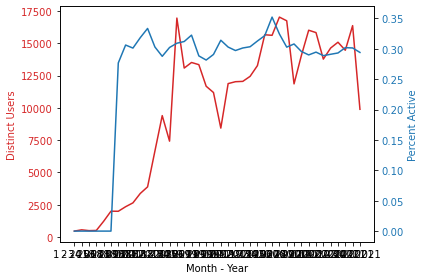

In [194]:
#References https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html

fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Month - Year")
ax1.set_ylabel("Distinct Users", color = color)
ax1.plot(fdates,uniqueCount, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("Percent Active", color = color)
ax2.plot(fdates,percentageList,color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.show